In [1]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

!apt-get update -qq
!apt-get install fonts-nanum* -qq


# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")


# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False





# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")



3.2.2
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib
sys_font number: 17
['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/Li

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


17.2 과소완전 선형 오토인코더로 PCA 수행하기

In [4]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
  angles = np.random.randn(m) * 3 * np.pi / 2 - 0.5
  data = np.empty( (m,3) )
  data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
  data[:, 1] = np.sin(angles) * 0.7 + noise + np.random.randn(m) / 2
  data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
  return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential(
    [
     keras.layers.Dense(2, input_shape=[3])
    ]
)
decoder = keras.models.Sequential(
    [
     keras.layers.Dense(3, input_shape=[2])
    ]
)
autoencoder = keras.models.Sequential(
    [
     encoder, decoder
    ]
)
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=20)
codings = encoder.predict(X_train)

Epoch 1/20
2/2 [==============================] - 0s 3ms/step - loss: 0.4439
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3958
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3586
Epoch 4/20
2/2 [==============================] - 0s 1ms/step - loss: 0.3308
Epoch 5/20
2/2 [==============================] - 0s 1ms/step - loss: 0.3067
Epoch 6/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2876
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2731
Epoch 8/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2588
Epoch 9/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2454
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2345
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2245
Epoch 12/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2153
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss: 0.

17.3.1 케라스를 사용하여 적층 오토인코더 구현하기

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
def rounded_accuracy(y_true, y_pred):
  return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28, 28]),
     keras.layers.Dense(100, activation="selu"),
     keras.layers.Dense(30, activation="selu")
    ]
)

stacked_decoder = keras.models.Sequential(
    [
     keras.layers.Dense(100, activation="selu", input_shape=[30]),
     keras.layers.Dense(28 * 28, activation="sigmoid"),
     keras.layers.Reshape([28, 28])
    ]
)

stacked_ae = keras.models.Sequential(
    [
     stacked_encoder, stacked_decoder
    ]
)

stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))
history = stacked_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3381 - val_loss: 0.3171
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3056 - val_loss: 0.3021
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2986 - val_loss: 0.2984
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2948 - val_loss: 0.2938
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2923 - val_loss: 0.2919
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2904 - val_loss: 0.2914
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2890 - val_loss: 0.2905
Epoch 8/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2877 - val_loss: 0.2967
Epoch 9/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2869 - val_loss: 0.2907
Epoch 10/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.285

17.3.2 재구성 시각화

In [9]:
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

def show_reconstructions(model, n_images=5):
  reconstructions = model.predict(X_valid[:n_images])
  fig = plt.figure(figsize=(n_images * 1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plot_image(X_valid[image_index])
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)

NameError: ignored

17.3.3 패션 MNIST 데이터셋 시각화

In [ ]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


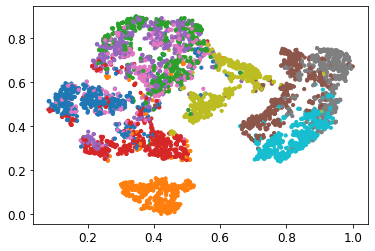

In [ ]:
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")

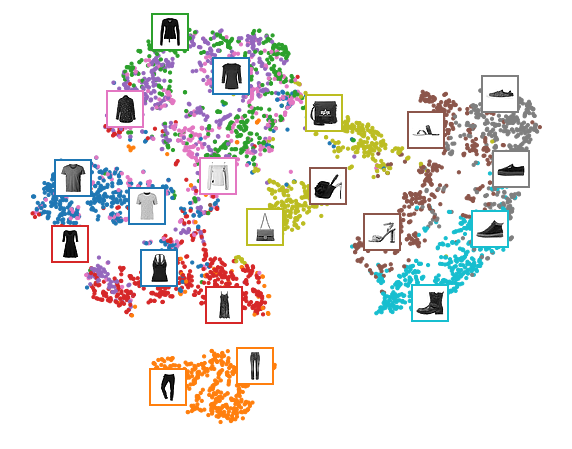

In [ ]:
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
  dist = np.sum( (position - image_positions) ** 2, axis=1 )
  if np.min(dist) > 0.02:
    image_positions = np.r_[image_positions, [position]]
    imagebox = mpl.offsetbox.AnnotationBbox(
        mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
        position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw":2})
    plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

17.3.5 가중치 묶기

In [ ]:
class DenseTranspose(keras.layers.Layer):
  def __init__(self, dense, activation=None, **kwargs):
    self.dense = dense
    self.activation = keras.activations.get(activation)
    super().__init__(**kwargs)
  def build(self, batch_input_shape):
    self.biases = self.add_weight(name="bias", initializer="zeros", shape=[self.dense.input_shape[-1]])
    super().build(batch_input_shape)  
  def call(self, inputs):
    z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
    return self.activation(z + self.biases)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28, 28]),
     dense_1,
     dense_2
    ]
)

tied_decoder = keras.models.Sequential(
    [
     DenseTranspose(dense_2, activation="selu"),
     DenseTranspose(dense_1, activation="sigmoid"),
     keras.layers.Reshape([28, 28])
    ]
)

tied_ae = keras.models.Sequential(
    [
     tied_encoder, tied_decoder
    ]
)

tied_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])

In [ ]:
history = tied_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3269 - rounded_accuracy: 0.8960 - val_loss: 0.3081 - val_rounded_accuracy: 0.9078
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2975 - rounded_accuracy: 0.9224 - val_loss: 0.2953 - val_rounded_accuracy: 0.9284
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2920 - rounded_accuracy: 0.9274 - val_loss: 0.3017 - val_rounded_accuracy: 0.9087
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2889 - rounded_accuracy: 0.9302 - val_loss: 0.2880 - val_rounded_accuracy: 0.9332
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2865 - rounded_accuracy: 0.9325 - val_loss: 0.2873 - val_rounded_accuracy: 0.9317
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2850 - rounded_accuracy: 0.9340 - val_loss: 0.2860 - val_rounded_accuracy: 0.9354
Epoch 7/10
1719/1719 [==================

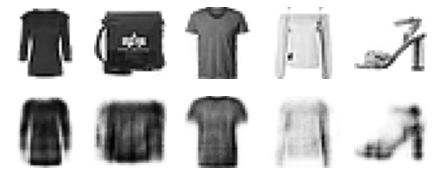

In [ ]:
show_reconstructions(tied_ae)
plt.show()

17.4 합성곱 오토인코더

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential(
    [
     keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
     keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
     keras.layers.MaxPool2D(pool_size=2),
     keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
     keras.layers.MaxPool2D(pool_size=2),
     keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"),
     keras.layers.MaxPool2D(pool_size=2)
    ]
)

conv_decoder = keras.models.Sequential(
  [
   keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid", activation="selu", input_shape=[3, 3, 64]),
   keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", activation="selu"),
   keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same", activation="sigmoid"),
   keras.layers.Reshape([28, 28])
  ]
)

conv_ae = keras.models.Sequential(
    [
     conv_encoder, conv_decoder
    ]
)

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0), metrics=[rounded_accuracy])

In [ ]:
history = conv_ae.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 64s 37ms/step - loss: 0.3019 - rounded_accuracy: 0.9187 - val_loss: 0.2847 - val_rounded_accuracy: 0.9289
Epoch 2/5
1719/1719 [==============================] - 64s 37ms/step - loss: 0.2756 - rounded_accuracy: 0.9414 - val_loss: 0.2730 - val_rounded_accuracy: 0.9454
Epoch 3/5
1719/1719 [==============================] - 70s 41ms/step - loss: 0.2708 - rounded_accuracy: 0.9463 - val_loss: 0.2697 - val_rounded_accuracy: 0.9496
Epoch 4/5
1719/1719 [==============================] - 66s 38ms/step - loss: 0.2682 - rounded_accuracy: 0.9491 - val_loss: 0.2685 - val_rounded_accuracy: 0.9493
Epoch 5/5
1719/1719 [==============================] - 65s 38ms/step - loss: 0.2664 - rounded_accuracy: 0.9510 - val_loss: 0.2671 - val_rounded_accuracy: 0.9511


In [ ]:
conv_encoder.summary()
print('-------------------')
conv_decoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

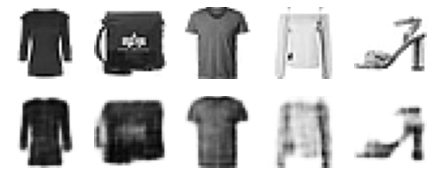

In [ ]:
show_reconstructions(conv_ae)
plt.show()

17.5 순환 오토인코더

In [ ]:
recurrent_encoder = keras.models.Sequential(
    [
     keras.layers.LSTM(100, return_sequences=True, input_shape=[None, 28]),
     keras.layers.LSTM(30)
    ]
)

recurrent_decoder = keras.models.Sequential(
    [
     keras.layers.RepeatVector(28, input_shape=[30]),
     keras.layers.LSTM(100, return_sequences=True),
     keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
    ]
)

recurrent_ae = keras.models.Sequential(
    [
     recurrent_encoder, recurrent_decoder
    ]
)

recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1), metrics=[rounded_accuracy])

In [ ]:
history = recurrent_ae.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 104s 60ms/step - loss: 0.5192 - rounded_accuracy: 0.7492 - val_loss: 0.4581 - val_rounded_accuracy: 0.8081
Epoch 2/5
1719/1719 [==============================] - 102s 59ms/step - loss: 0.4050 - rounded_accuracy: 0.8432 - val_loss: 0.3743 - val_rounded_accuracy: 0.8683
Epoch 3/5
1719/1719 [==============================] - 103s 60ms/step - loss: 0.3653 - rounded_accuracy: 0.8710 - val_loss: 0.3603 - val_rounded_accuracy: 0.8766
Epoch 4/5
1719/1719 [==============================] - 103s 60ms/step - loss: 0.3507 - rounded_accuracy: 0.8809 - val_loss: 0.3523 - val_rounded_accuracy: 0.8772
Epoch 5/5
1719/1719 [==============================] - 102s 59ms/step - loss: 0.3405 - rounded_accuracy: 0.8875 - val_loss: 0.3361 - val_rounded_accuracy: 0.8919


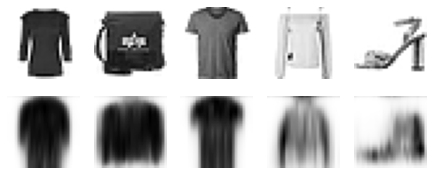

In [ ]:
show_reconstructions(recurrent_ae)
plt.show()

17.6 잡음 제거 오토인코더

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
dropout_encoder = keras.models.Sequential(
  [
   keras.layers.Flatten(input_shape=[28, 28]),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(100, activation="selu"),
   keras.layers.Dense(30, activation="selu")
  ]
)

dropout_decoder = keras.models.Sequential(
    [
     keras.layers.Dense(100, activation="selu", input_shape=[30]),
     keras.layers.Dense(28 * 28, activation="sigmoid"),
     keras.layers.Reshape([28, 28])
    ]
)

dropout_ae = keras.models.Sequential(
    [
     dropout_encoder, dropout_decoder
    ]
)

dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0), metrics=[rounded_accuracy])

In [ ]:
history = dropout_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3568 - rounded_accuracy: 0.8710 - val_loss: 0.3200 - val_rounded_accuracy: 0.9041
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3182 - rounded_accuracy: 0.9032 - val_loss: 0.3126 - val_rounded_accuracy: 0.9110
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3128 - rounded_accuracy: 0.9075 - val_loss: 0.3075 - val_rounded_accuracy: 0.9153
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3092 - rounded_accuracy: 0.9102 - val_loss: 0.3041 - val_rounded_accuracy: 0.9178
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3067 - rounded_accuracy: 0.9123 - val_loss: 0.3015 - val_rounded_accuracy: 0.9193
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3048 - rounded_accuracy: 0.9139 - val_loss: 0.3014 - val_rounded_accuracy: 0.9172
Epoch 7/10
1719/1719 [==================

In [10]:
def show_reconstructions(model, images=X_valid, n_images=5):
  reconstructions = model.predict(images[:n_images])
  fig = plt.figure(figsize=(n_images * 1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plot_image(images[image_index])
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plot_image(reconstructions[image_index])

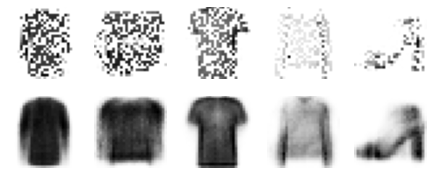

In [ ]:
dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))

17.7 희소 오토인코더

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28, 28]),
     keras.layers.Dense(100, activation="selu"),
     keras.layers.Dense(300, activation="sigmoid"),
     keras.layers.ActivityRegularization(l1=1e-3)
    ]
)

sparse_l1_decoder = keras.models.Sequential(
  [
   keras.layers.Dense(100, activation="selu", input_shape=[300]),
   keras.layers.Dense(28 * 28, activation="sigmoid"),
   keras.layers.Reshape([28, 28])
  ]
)

sparse_l1_ae = keras.models.Sequential(
    [
     sparse_l1_encoder, sparse_l1_decoder
    ]
)

sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0), metrics=[rounded_accuracy])

In [ ]:
history = sparse_l1_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4310 - rounded_accuracy: 0.8129 - val_loss: 0.3808 - val_rounded_accuracy: 0.8555
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3690 - rounded_accuracy: 0.8689 - val_loss: 0.3638 - val_rounded_accuracy: 0.8741
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3545 - rounded_accuracy: 0.8799 - val_loss: 0.3502 - val_rounded_accuracy: 0.8857
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3437 - rounded_accuracy: 0.8876 - val_loss: 0.3418 - val_rounded_accuracy: 0.8898
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3372 - rounded_accuracy: 0.8920 - val_loss: 0.3368 - val_rounded_accuracy: 0.8949
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3320 - rounded_accuracy: 0.8968 - val_loss: 0.3316 - val_rounded_accuracy: 0.8992
Epoch 7/10
1719/1719 [==================

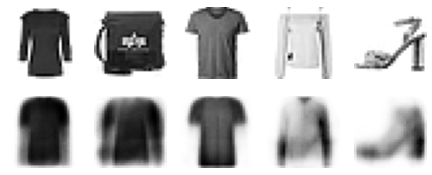

In [ ]:
show_reconstructions(sparse_l1_ae)
plt.show()

In [11]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
  def __init__(self, weight, target=0.1):
    self.weight = weight
    self.target = target
  def __call__(self, inputs):
    mean_activities = K.mean(inputs, axis=0)
    return self.weight * (
        kl_divergence(self.target, mean_activities) + kl_divergence(1. - self.target, 1. - mean_activities)
    )

def plot_percent_hist(ax, data, bins):
  counts, _ = np.histogram(data, bins=bins)
  widths = bins[1:] - bins[:-1]
  x = bins[:-1] + widths / 2
  ax.bar(x, counts / len(data), width=widths*0.8)
  ax.xaxis.set_ticks(bins)
  ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
      lambda y, position: "{}%".format(int(np.round(100 * y)))
  ))
  ax.grid(True)

def plot_activations_histogram(encoder, height=1, n_bins=10):
  X_valid_codings = encoder(X_valid).numpy()
  activation_means = X_valid_codings.mean(axis=0)
  mean = activation_means.mean()
  bins = np.linspace(0, 1, n_bins + 1)

  fig, [ax1, ax2] = plt.subplots(figsize=(10, 3), nrows=1, ncols=2, sharey=True)
  plot_percent_hist(ax1, X_valid_codings.ravel(), bins)
  ax1.plot( 
      [mean, mean], [0, height], "k--", label="전체 평균 = {:.2f}".format(mean)
  )
  ax1.legend(loc="upper center", fontsize=14)
  ax1.set_xlabel("활성화")
  ax1.set_ylabel("% 활성화")
  ax1.axis([0, 1, 0, height])
  plot_percent_hist(ax2, activation_means, bins)
  ax2.plot([mean, mean], [0, height], "k--")
  ax2.set_xlabel("뉴런 평균 활성화")
  ax2.set_ylabel("% 뉴런")
  ax2.axis([0, 1, 0, height])



In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential(
  [
   keras.layers.Flatten(input_shape=[28, 28]),
   keras.layers.Dense(100, activation="selu"),
   keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
  ]
)

sparse_kl_decoder = keras.models.Sequential(
  [
   keras.layers.Dense(100, activation="selu", input_shape=[300]),
   keras.layers.Dense(28 * 28, activation="sigmoid"),
   keras.layers.Reshape([28, 28])
  ]
)

sparse_kl_ae = keras.models.Sequential([
  sparse_kl_encoder, sparse_kl_decoder
])

sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0), metrics=[rounded_accuracy])

history = sparse_kl_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4150 - rounded_accuracy: 0.8121 - val_loss: 0.3716 - val_rounded_accuracy: 0.8564
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3531 - rounded_accuracy: 0.8763 - val_loss: 0.3442 - val_rounded_accuracy: 0.8847
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3340 - rounded_accuracy: 0.8918 - val_loss: 0.3293 - val_rounded_accuracy: 0.8975
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3224 - rounded_accuracy: 0.9018 - val_loss: 0.3213 - val_rounded_accuracy: 0.9043
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3169 - rounded_accuracy: 0.9063 - val_loss: 0.3171 - val_rounded_accuracy: 0.9078
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3135 - rounded_accuracy: 0.9093 - val_loss: 0.3140 - val_rounded_accuracy: 0.9105
Epoch 7/10
1719/1719 [==================

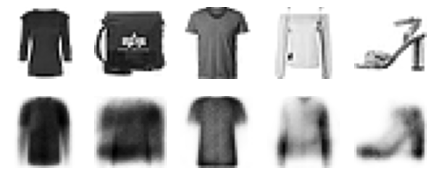

In [ ]:
show_reconstructions(sparse_kl_ae)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/bac

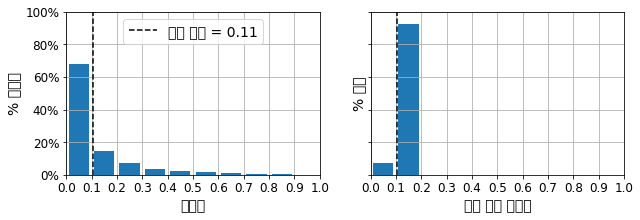

In [ ]:
plot_activations_histogram(sparse_kl_encoder)
plt.show()

(0.0, 1.0, 0.0, 0.95)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

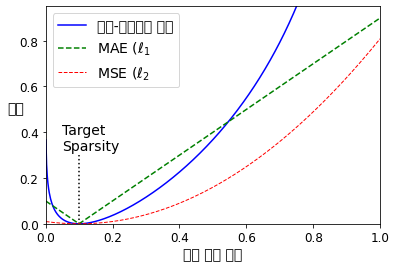

In [ ]:
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p / q) + (1 - p) * np.log( (1 - p) / ( 1 - q ) )
mse = (p - q) **2
mae = np.abs(p - q)
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nSparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="콜백-라이블러 발산")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("실제 희소 정도")
plt.ylabel("비용", rotation=0)
plt.axis([0, 1, 0, 0.95])


17.8 변이형 오토인코더

In [13]:
class Sampling(keras.layers.Layer):
  def call(self, inputs):
    mean, log_var = inputs
    return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings]
)

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), axis= -1
)

variational_ae.add_loss(K.mean(latent_loss) / 784)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])


In [15]:
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128, validation_data=(X_valid, X_valid))

Epoch 1/25
430/430 [==============================] - 7s 17ms/step - loss: 0.3895 - rounded_accuracy: 0.8610 - val_loss: 0.3594 - val_rounded_accuracy: 0.8787
Epoch 2/25
430/430 [==============================] - 7s 16ms/step - loss: 0.3424 - rounded_accuracy: 0.8981 - val_loss: 0.3407 - val_rounded_accuracy: 0.9033
Epoch 3/25
430/430 [==============================] - 7s 16ms/step - loss: 0.3325 - rounded_accuracy: 0.9055 - val_loss: 0.3302 - val_rounded_accuracy: 0.9091
Epoch 4/25
430/430 [==============================] - 7s 16ms/step - loss: 0.3276 - rounded_accuracy: 0.9093 - val_loss: 0.3295 - val_rounded_accuracy: 0.9112
Epoch 5/25
430/430 [==============================] - 7s 16ms/step - loss: 0.3246 - rounded_accuracy: 0.9119 - val_loss: 0.3292 - val_rounded_accuracy: 0.9105
Epoch 6/25
430/430 [==============================] - 7s 15ms/step - loss: 0.3225 - rounded_accuracy: 0.9138 - val_loss: 0.3243 - val_rounded_accuracy: 0.9127
Epoch 7/25
430/430 [==========================

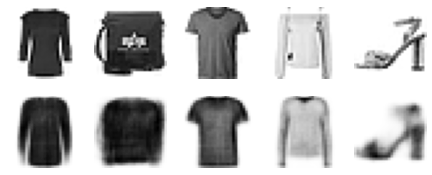

In [16]:
show_reconstructions(variational_ae)
plt.show()

17.8.1 패션 MNIST 이미지 생성하기

In [17]:
def plot_multiple_images(images, n_cols=None):
  n_cols = n_cols or len(images)
  n_rows = (len(images) - 1) // n_cols + 1
  if images.shape[-1] == 1:
    images = np.squeeze(images, axis= -1)
  plt.figure(figsize=(n_cols, n_rows))
  for index, image in enumerate(images):
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

Saving figure vae_generated_images_plot


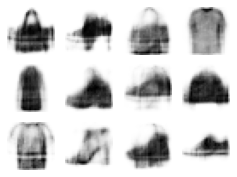

In [18]:
tf.random.set_seed(42)

codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
save_fig("vae_generated_images_plot", tight_layout=False)

Saving figure semantic_interpolation_plot


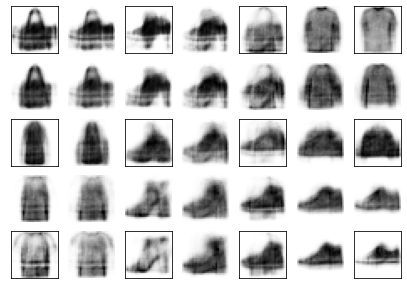

In [19]:
tf.random.set_seed(42)
np.random.seed(42)

codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
  plt.subplot(5, 7, index+1)
  if index%7%2==0 and index//7%2==0:
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
  else:
    plt.axis("off")
  plt.imshow(image, cmap="binary")
save_fig("semantic_interpolation_plot", tight_layout=False)

17.9 생성적 적대 신경망

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 30

generator = keras.models.Sequential(
  [
   keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
   keras.layers.Dense(150, activation="selu"),
   keras.layers.Dense(28 * 28, activation="sigmoid"),
   keras.layers.Reshape([28, 28])
  ]
)

discriminator = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28, 28]),
     keras.layers.Dense(150, activation="selu"),
     keras.layers.Dense(100, activation="selu"),
     keras.layers.Dense(1, activation="sigmoid")
    ]
)

gan = keras.models.Sequential(
    [generator, discriminator]
)

discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable= False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
def plot_multiple_images(images, n_cols=None):
  n_cols = n_cols or len(images)
  n_rows = (len(images) - 1) // n_cols + 1
  if images.shape[-1] == 1:
    images = np.squeeze(images, axis=-1)
  plt.figure(figsize=(n_cols, n_rows))
  for index, image in enumerate(images):
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    print("Epoch {}/{}".format(epoch + 1, n_epochs))
    for X_batch in dataset:
      #단계1 판별자 훈련
      noise = tf.random.normal(shape=[batch_size, codings_size])
      generated_images = generator(noise)
      X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
      y1 = tf.constant(
          [[0.]] * batch_size + [[1.]] * batch_size
      )
      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_and_real, y1)
      #단계2 생성자 훈련
      noise = tf.random.normal(shape=[batch_size, codings_size])
      y2 = tf.constant(
          [[1.]] * batch_size
      )
      discriminator.trainable = False
      gan.train_on_batch(noise, y2)
    plot_multiple_images(generated_images, 8)
    plt.show()
    

Epoch 1/1


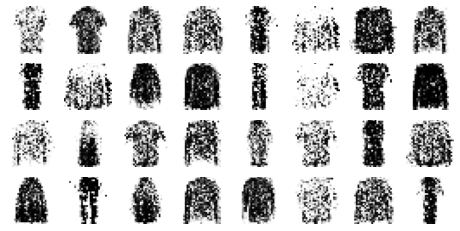

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

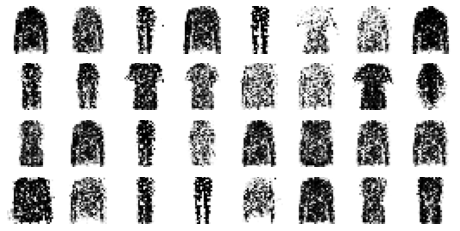

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)


In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

Output hidden; open in https://colab.research.google.com to view.

17.9.2 심층 합성곱 GAN

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 100

generator = keras.models.Sequential(
    [
     keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
     keras.layers.Reshape([7, 7, 128]),
     keras.layers.BatchNormalization(),
     keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME", activation="selu"),
     keras.layers.BatchNormalization(),
     keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME", activation="tanh")
    ]
)

discriminator = keras.models.Sequential(
    [
     keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME", activation=keras.layers.LeakyReLU(0.2), input_shape=[28, 28, 1]),
     keras.layers.Dropout(0.4),
     keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME", activation=keras.layers.LeakyReLU(0.2), input_shape=[28, 28, 1]),
     keras.layers.Dropout(0.4),
     keras.layers.Flatten(),
     keras.layers.Dense(1, activation="sigmoid")
    ]
)

gan = keras.models.Sequential(
    [generator, discriminator]
)

discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

Output hidden; open in https://colab.research.google.com to view.